# Project Outline

## 1. Load Data

In [1]:
import csv
import sqlite3
import pandas as pd

# Step 1: Load and parse the CSV file
file_path = 'adult-all.csv' #https://github.com/jbrownlee/Datasets/blob/master/adult-all.csv
data = []
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

with open(file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(dict(zip(columns, row)))

# Step 2: Create a normalized database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables for categorical data
cursor.execute('''CREATE TABLE workclass (id INTEGER PRIMARY KEY, workclass TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE education (id INTEGER PRIMARY KEY, education TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE marital_status (id INTEGER PRIMARY KEY, marital_status TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE occupation (id INTEGER PRIMARY KEY, occupation TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE relationship (id INTEGER PRIMARY KEY, relationship TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE race (id INTEGER PRIMARY KEY, race TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE sex (id INTEGER PRIMARY KEY, sex TEXT UNIQUE)''')
cursor.execute('''CREATE TABLE native_country (id INTEGER PRIMARY KEY, native_country TEXT UNIQUE)''')

# Create main table
cursor.execute('''CREATE TABLE adult_data 
               (id INTEGER PRIMARY KEY, 
               age INTEGER, 
               workclass_id INTEGER,
               fnlwgt INTEGER,
               education_id INTEGER,
               education_num INTEGER,
               marital_status_id INTEGER,
               occupation_id INTEGER,
               relationship_id INTEGER,
               race_id INTEGER,
               sex_id INTEGER,
               capital_gain INTEGER,
               capital_loss INTEGER,
               hours_per_week INTEGER,
               native_country_id INTEGER,
               income TEXT)''')

# Insert data into tables
for row in data:
    cursor.execute("INSERT OR IGNORE INTO workclass (workclass) VALUES (?)", (row['workclass'],))
    cursor.execute("INSERT OR IGNORE INTO education (education) VALUES (?)", (row['education'],))
    cursor.execute("INSERT OR IGNORE INTO marital_status (marital_status) VALUES (?)", (row['marital-status'],))
    cursor.execute("INSERT OR IGNORE INTO occupation (occupation) VALUES (?)", (row['occupation'],))
    cursor.execute("INSERT OR IGNORE INTO relationship (relationship) VALUES (?)", (row['relationship'],))
    cursor.execute("INSERT OR IGNORE INTO race (race) VALUES (?)", (row['race'],))
    cursor.execute("INSERT OR IGNORE INTO sex (sex) VALUES (?)", (row['sex'],))
    cursor.execute("INSERT OR IGNORE INTO native_country (native_country) VALUES (?)", (row['native-country'],))
    
    cursor.execute('''INSERT INTO adult_data 
                   (age, workclass_id, fnlwgt, education_id, education_num, marital_status_id,
                   occupation_id, relationship_id, race_id, sex_id, capital_gain, capital_loss,
                   hours_per_week, native_country_id, income)
                   VALUES 
                   (?, (SELECT id FROM workclass WHERE workclass = ?),
                   ?, (SELECT id FROM education WHERE education = ?),
                   ?, (SELECT id FROM marital_status WHERE marital_status = ?),
                   (SELECT id FROM occupation WHERE occupation = ?),
                   (SELECT id FROM relationship WHERE relationship = ?),
                   (SELECT id FROM race WHERE race = ?),
                   (SELECT id FROM sex WHERE sex = ?),
                   ?, ?, ?, (SELECT id FROM native_country WHERE native_country = ?), ?)''',
                   (row['age'], row['workclass'], row['fnlwgt'], row['education'], row['education-num'],
                    row['marital-status'], row['occupation'], row['relationship'], row['race'],
                    row['sex'], row['capital-gain'], row['capital-loss'], row['hours-per-week'],
                    row['native-country'], row['income']))

conn.commit()

# Step 3: Write an SQL query with joins to reconstruct the data
query = '''
SELECT ad.age, w.workclass, ad.fnlwgt, e.education, ad.education_num, 
       ms.marital_status, o.occupation, r.relationship, rc.race, s.sex, 
       ad.capital_gain, ad.capital_loss, ad.hours_per_week, nc.native_country, ad.income
FROM adult_data ad
JOIN workclass w ON ad.workclass_id = w.id
JOIN education e ON ad.education_id = e.id
JOIN marital_status ms ON ad.marital_status_id = ms.id
JOIN occupation o ON ad.occupation_id = o.id
JOIN relationship r ON ad.relationship_id = r.id
JOIN race rc ON ad.race_id = rc.id
JOIN sex s ON ad.sex_id = s.id
JOIN native_country nc ON ad.native_country_id = nc.id
'''

# Load the result into a Pandas DataFrame
data = pd.read_sql_query(query, conn)

# Display the first five of the DataFrame
print(data.head())

# Close the database connection
conn.close()

FileNotFoundError: [Errno 2] No such file or directory: 'adult-all.csv'

In [3]:
print(data)

       age         workclass  fnlwgt  education  education_num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64                 ?  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital_status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Assign column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
data.columns = columns

# Remove whitespace from string columns
string_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                  'relationship', 'race', 'sex', 'native-country', 'income']
for column in string_columns:
    data[column] = data[column].str.strip()

# Remove rows with missing data
data_cleaned = data.dropna()

# Replace '?' with 'unknown'
data_cleaned = data.replace('?', 'unknown')

# Standardize strings (convert to lowercase)
for column in string_columns:
    data_cleaned[column] = data_cleaned[column].str.lower()

# Correct column data types
data_cleaned['age'] = data_cleaned['age'].astype(int)
data_cleaned['fnlwgt'] = data_cleaned['fnlwgt'].astype(int)
data_cleaned['education-num'] = data_cleaned['education-num'].astype(int)
data_cleaned['capital-gain'] = data_cleaned['capital-gain'].astype(int)
data_cleaned['capital-loss'] = data_cleaned['capital-loss'].astype(int)
data_cleaned['hours-per-week'] = data_cleaned['hours-per-week'].astype(int)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Identify categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country', 'income']

# Encode categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
# Display the cleaned dataset info
print(data_cleaned)

       age         workclass  fnlwgt  education  education-num  \
0       39         state-gov   77516  bachelors             13   
1       50  self-emp-not-inc   83311  bachelors             13   
2       38           private  215646    hs-grad              9   
3       53           private  234721       11th              7   
4       28           private  338409  bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           private  215419  bachelors             13   
48838   64           unknown  321403    hs-grad              9   
48839   38           private  374983  bachelors             13   
48840   44           private   83891  bachelors             13   
48841   35      self-emp-inc  182148  bachelors             13   

           marital-status         occupation    relationship  \
0           never-married       adm-clerical   not-in-family   
1      married-civ-spouse    exec-managerial         husband   
2              

In [8]:
# Display the cleaned dataset info
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int32 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int32 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int32 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int32 
 11  capital-loss    48842 non-null  int32 
 12  hours-per-week  48842 non-null  int32 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.5+ MB
None


In [9]:
data_cleaned["income"].value_counts()

<=50k    37155
>50k     11687
Name: income, dtype: int64

In [10]:
data_cleaned.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
from sklearn.model_selection import train_test_split
# Check for any other potentially imbalanced categorical variables
for column in string_columns:
    if column != 'income':
        print(f"\n{column} distribution:")
        print(data_cleaned[column].value_counts(normalize=True).head())

# Perform train/test split with stratification on 'income'
X = data_cleaned.drop('income', axis=1)
y = data_cleaned['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the size of the train and test sets
print("\nTrain set size:", len(X_train))
print("Test set size:", len(X_test))

# Verify the stratification
print("\nIncome distribution in train set:")
print(y_train.value_counts(normalize=True))
print("\nIncome distribution in test set:")
print(y_test.value_counts(normalize=True))


workclass distribution:
private             0.694198
self-emp-not-inc    0.079071
local-gov           0.064207
unknown             0.057307
state-gov           0.040559
Name: workclass, dtype: float64

education distribution:
hs-grad         0.323164
some-college    0.222718
bachelors       0.164305
masters         0.054400
assoc-voc       0.042197
Name: education, dtype: float64

marital-status distribution:
married-civ-spouse    0.458192
never-married         0.329982
divorced              0.135805
separated             0.031325
widowed               0.031080
Name: marital-status, dtype: float64

occupation distribution:
prof-specialty     0.126367
craft-repair       0.125138
exec-managerial    0.124606
adm-clerical       0.114881
sales              0.112690
Name: occupation, dtype: float64

relationship distribution:
husband          0.403669
not-in-family    0.257627
own-child        0.155215
unmarried        0.104930
wife             0.047725
Name: relationship, dtype: float64

r

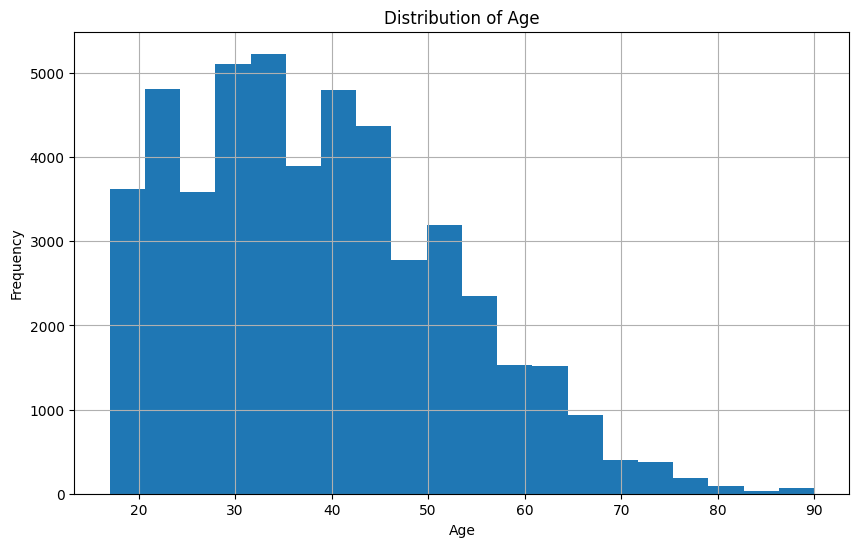

In [12]:
# Visualize the distribution of age
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_cleaned['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

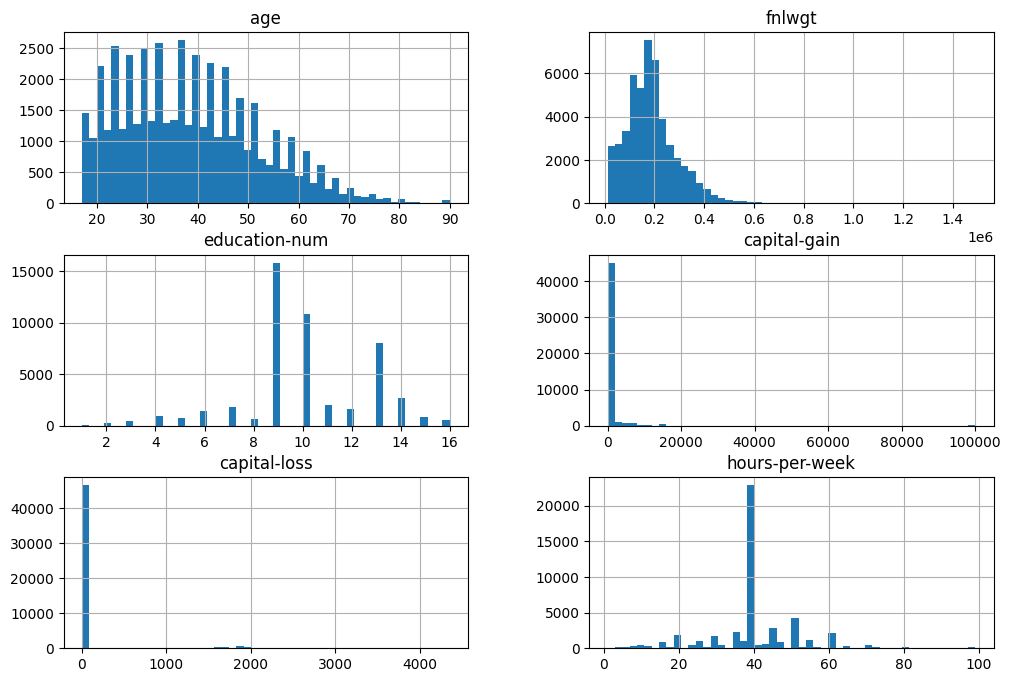

In [13]:
import matplotlib.pyplot as plt

# Generate histograms for all numeric columns
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data_cleaned[numeric_columns].hist(bins=50, figsize=(12, 8))
plt.show()

In [14]:
from ydata_profiling import ProfileReport
import numpy as np


# Generate the report
profile = ProfileReport(data_cleaned, title="Profiling Report")

In [15]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

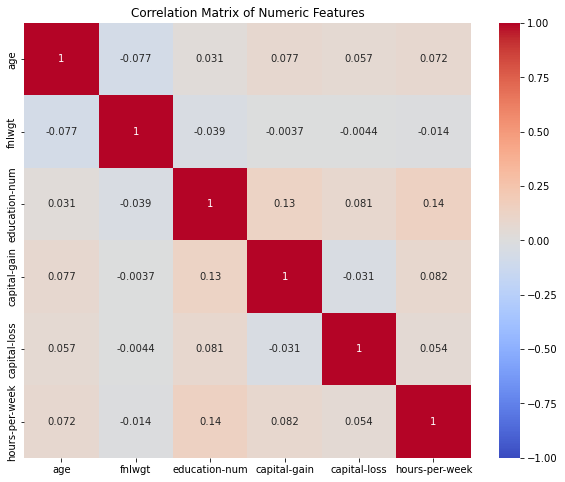

In [33]:
import seaborn as sns
# Visualize the correlation matrix
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [35]:
import mlflow

# Create the experiment if it doesn't exist
experiment_name = "Adult Income Classification"
try:
    experiment_id = mlflow.create_experiment(experiment_name)
except mlflow.exceptions.MlflowException:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Set the experiment as active
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///C:/Users/pogoz/EAS503%20Final/mlruns/652044503664654552', creation_time=1734727916986, experiment_id='652044503664654552', last_update_time=1734727916986, lifecycle_stage='active', name='Adult Income Classification', tags={}>

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import dagshub
dagshub.init(repo_owner='kobekim27', repo_name='EAS503', mlflow=True)
# Assuming 'data_cleaned' is your final DataFrame and 'income' is the target
print("Target distribution in the whole dataset:")
print(data_cleaned['income'].value_counts(normalize=True))

X = data_cleaned.drop('income', axis=1)
y = data_cleaned['income']

# Stratify by the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain set 'income' distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set 'income' distribution:")
print(y_test.value_counts(normalize=True))

# Identify numeric & categorical features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Log transform for 'capital-gain' and 'capital-loss' if skewed
def log_transform_capital(X):
    X = X.copy()
    for feature in ['capital-gain', 'capital-loss']:
        idx = numeric_features.index(feature)
        X[:, idx] = np.log1p(X[:, idx])
    return X

log_transformer = FunctionTransformer(log_transform_capital, validate=False)

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log_transform", log_transformer),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Base model: Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("clf", model)
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
cv_results = grid_search.cv_results_
mean_f1 = grid_search.best_score_
std_f1 = cv_results['std_test_score'][grid_search.best_index_]

print("\nBest Params:", grid_search.best_params_)
print("CV Mean F1:", mean_f1, "CV Std F1:", std_f1)

# Evaluate on Training and Test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

print("\nTrain F1:", f1_train)
print("Test F1:", f1_test)
print("Confusion Matrix:\n", cm)

# Log results to MLflow (DagsHub)
MLFLOW_TRACKING_URI = "https://dagshub.com/kobekim27/EAS503.mlflow"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Adult_Income_Experiment1")

from mlflow.models import infer_signature
signature = infer_signature(X_train, best_model.predict(X_train))

with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_params(grid_search.best_params_)

    # Log CV results
    mlflow.log_metric("cv_mean_f1", mean_f1)
    mlflow.log_metric("cv_std_f1", std_f1)

    # Log train/test metrics
    mlflow.log_metric("f1_train", f1_train)
    mlflow.log_metric("f1_test", f1_test)

    # Log confusion matrix elements
    mlflow.log_metric("tn", tn)
    mlflow.log_metric("fp", fp)
    mlflow.log_metric("fn", fn)
    mlflow.log_metric("tp", tp)

    # Log the model
    mlflow.sklearn.log_model(best_model, "best_model", signature=signature)

Accessing as kobekim27

Initialized MLflow to track repo "kobekim27/EAS503"

Repository kobekim27/EAS503 initialized!

Target distribution in the whole dataset:
<=50k    0.760718
>50k     0.239282
Name: income, dtype: float64

Train set 'income' distribution:
<=50k    0.76073
>50k     0.23927
Name: income, dtype: float64

Test set 'income' distribution:
<=50k    0.760672
>50k     0.239328
Name: income, dtype: float64


C:\Users\pogoz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(



Best Params: {'clf__C': 0.01, 'clf__penalty': 'l2'}
CV Mean F1: nan CV Std F1: nan

Train F1: 0.8384290688306998
Test F1: 0.8348234580062959
Confusion Matrix:
 [[6920  511]
 [1032 1306]]


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run capable-steed-661 at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/0/runs/7e025782ae614a4eb65e97a5758f1690
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/0


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn

# Assuming 'data_cleaned' is your final DataFrame and 'income' is the target
X = data_cleaned.drop('income', axis=1)
y = data_cleaned['income']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Stratify by the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify numeric & categorical features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Log transform for 'capital-gain' and 'capital-loss' if skewed
def log_transform_capital(X):
    X = X.copy()
    for feature in ['capital-gain', 'capital-loss']:
        idx = numeric_features.index(feature)
        X[:, idx] = np.log1p(X[:, idx])
    return X

log_transformer = FunctionTransformer(log_transform_capital, validate=False)

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log_transform", log_transformer),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'RidgeClassifier': RidgeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Hyperparameter grids for each classifier
param_grids = {
    'LogisticRegression': {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2']},
    'RidgeClassifier': {'clf__alpha': [0.1, 1.0, 10.0]},
    'RandomForestClassifier': {'clf__n_estimators': [100, 200], 'clf__max_depth': [5, 10]},
    'XGBClassifier': {'clf__learning_rate': [0.01, 0.1], 'clf__n_estimators': [100, 200]}
}

# Set up MLflow
MLFLOW_TRACKING_URI = "https://dagshub.com/kobekim27/EAS503.mlflow"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Adult_Income_Experiment2")

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    with mlflow.start_run(run_name=clf_name):
        pipeline = Pipeline([
            ("preprocessing", preprocessing),
            ("clf", clf)
        ])

        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grids[clf_name], scoring='f1', cv=cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        cv_results = grid_search.cv_results_
        mean_f1 = grid_search.best_score_
        std_f1 = cv_results['std_test_score'][grid_search.best_index_]

        # Evaluate on Training and Test sets
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')

        cm = confusion_matrix(y_test, y_pred_test)
        tn, fp, fn, tp = cm.ravel()

        # Log results to MLflow
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("cv_mean_f1", mean_f1)
        mlflow.log_metric("cv_std_f1", std_f1)
        mlflow.log_metric("f1_train", f1_train)
        mlflow.log_metric("f1_test", f1_test)
        mlflow.log_metric("tn", tn)
        mlflow.log_metric("fp", fp)
        mlflow.log_metric("fn", fn)
        mlflow.log_metric("tp", tp)

        # Log the model
        signature = mlflow.models.infer_signature(X_train, best_model.predict(X_train))
        mlflow.sklearn.log_model(best_model, "best_model", signature=signature)

        print(f"\nResults for {clf_name}:")
        print("Best Params:", grid_search.best_params_)
        print("CV Mean F1:", mean_f1, "CV Std F1:", std_f1)
        print("Train F1:", f1_train)
        print("Test F1:", f1_test)
        print("Confusion Matrix:\n", cm)

# If you need to convert predictions back to original labels
# y_pred_original = le.inverse_transform(y_pred)


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for LogisticRegression:
Best Params: {'clf__C': 10, 'clf__penalty': 'l2'}
CV Mean F1: 0.6475963204196834 CV Std F1: 0.005290785595776245
Train F1: 0.8428714332601691
Test F1: 0.837988452943726
Confusion Matrix:
 [[6874  557]
 [ 972 1366]]
🏃 View run LogisticRegression at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1/runs/6f7b1d22aa22499cb0ee870eacb055e0
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for RidgeClassifier:
Best Params: {'clf__alpha': 0.1}
CV Mean F1: 0.6176305620517243 CV Std F1: 0.003152000326563029
Train F1: 0.8347697609257538
Test F1: 0.8330094609212894
Confusion Matrix:
 [[6991  440]
 [1098 1240]]
🏃 View run RidgeClassifier at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1/runs/882a29cce99c456bb3a16273a0cb8c77
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for RandomForestClassifier:
Best Params: {'clf__max_depth': 10, 'clf__n_estimators': 200}
CV Mean F1: 0.6460501904591284 CV Std F1: 0.0055898936958138044
Train F1: 0.8543604309340002
Test F1: 0.8491033595243173
Confusion Matrix:
 [[7106  325]
 [1054 1284]]
🏃 View run RandomForestClassifier at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1/runs/8e0d321c30654dd59b1858d45ae47cbe
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1


C:\Users\pogoz\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#ha


Results for XGBClassifier:
Best Params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
CV Mean F1: 0.707273924168102 CV Std F1: 0.0051755379178227
Train F1: 0.88556893163684
Test F1: 0.874224561495829
Confusion Matrix:
 [[7030  401]
 [ 789 1549]]
🏃 View run XGBClassifier at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1/runs/c4346e93e98e47b6be4d9ffe12179a0b
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/1


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
import dagshub

# Initialize DagsHub
dagshub.init(repo_owner='kobekim27', repo_name='EAS503', mlflow=True)

# Assuming 'data_cleaned' is your final DataFrame and 'income' is the target
X = data_cleaned.drop('income', axis=1)
y = data_cleaned['income']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Feature Engineering
def engineer_features(X):
    X = X.copy()
    
    # Combine education-num and hours-per-week
    X['education_work_intensity'] = X['education-num'] * X['hours-per-week']
    
    # Create age groups
    X['age_group'] = pd.cut(X['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    
    # Combine capital-gain and capital-loss
    X['net_capital'] = X['capital-gain'] - X['capital-loss']
    
    # Create a feature for total work experience
    X['work_experience'] = X['age'] - X['education-num'] - 6
    X['work_experience'] = X['work_experience'].clip(lower=0)
    
    # Interaction between age and education-num
    X['age_education_interaction'] = X['age'] * X['education-num']
    
    return X

X = engineer_features(X)

# Update feature lists
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 
                    'education_work_intensity', 'net_capital', 'work_experience', 'age_education_interaction']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age_group']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'RidgeClassifier': RidgeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Hyperparameter grids
param_grids = {
    'LogisticRegression': {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2']},
    'RidgeClassifier': {'clf__alpha': [0.1, 1.0, 10.0]},
    'RandomForestClassifier': {'clf__n_estimators': [100, 200], 'clf__max_depth': [5, 10, None]},
    'XGBClassifier': {'clf__learning_rate': [0.01, 0.1], 'clf__n_estimators': [100, 200], 'clf__max_depth': [3, 5, 7]}
}

# Set up MLflow
MLFLOW_TRACKING_URI = "https://dagshub.com/kobekim27/EAS503.mlflow"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Adult_Income_Experiment3")

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    with mlflow.start_run(run_name=f"{clf_name}_FeatureEngineering"):
        pipeline = Pipeline([
            ("preprocessing", preprocessing),
            ("clf", clf)
        ])

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grids[clf_name], scoring='f1', cv=cv, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        cv_results = grid_search.cv_results_
        mean_f1 = grid_search.best_score_
        std_f1 = cv_results['std_test_score'][grid_search.best_index_]

        # Evaluate on Training and Test sets
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')

        cm = confusion_matrix(y_test, y_pred_test)
        tn, fp, fn, tp = cm.ravel()

        # Log results to MLflow
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("cv_mean_f1", mean_f1)
        mlflow.log_metric("cv_std_f1", std_f1)
        mlflow.log_metric("f1_train", f1_train)
        mlflow.log_metric("f1_test", f1_test)
        mlflow.log_metric("tn", tn)
        mlflow.log_metric("fp", fp)
        mlflow.log_metric("fn", fn)
        mlflow.log_metric("tp", tp)

        # Log the model
        signature = mlflow.models.infer_signature(X_train, best_model.predict(X_train))
        mlflow.sklearn.log_model(best_model, "best_model", signature=signature)

        print(f"\nResults for {clf_name}:")
        print("Best Params:", grid_search.best_params_)
        print("CV Mean F1:", mean_f1, "CV Std F1:", std_f1)
        print("Train F1:", f1_train)
        print("Test F1:", f1_test)
        print("Confusion Matrix:\n", cm)


Initialized MLflow to track repo "kobekim27/EAS503"

Repository kobekim27/EAS503 initialized!

C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for LogisticRegression:
Best Params: {'clf__C': 1, 'clf__penalty': 'l2'}
CV Mean F1: 0.6708465799594714 CV Std F1: 0.004079270010301249
Train F1: 0.851717208227791
Test F1: 0.8506952984919958
Confusion Matrix:
 [[6930  501]
 [ 909 1429]]
🏃 View run LogisticRegression_FeatureEngineering at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2/runs/ec954d05109240d98f2d6f65f795e7e8
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for RidgeClassifier:
Best Params: {'clf__alpha': 0.1}
CV Mean F1: 0.6106453870961513 CV Std F1: 0.00864220668907773
Train F1: 0.8334161749496206
Test F1: 0.8332657492104164
Confusion Matrix:
 [[7043  388]
 [1133 1205]]
🏃 View run RidgeClassifier_FeatureEngineering at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2/runs/efa4ebf2e4b64e9ab76cde3e11cd3c4b
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2


C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(



Results for RandomForestClassifier:
Best Params: {'clf__max_depth': None, 'clf__n_estimators': 200}
CV Mean F1: 0.6707274721772781 CV Std F1: 0.004474576202624867
Train F1: 0.9998976275177233
Test F1: 0.8476190824118092
Confusion Matrix:
 [[6864  567]
 [ 884 1454]]
🏃 View run RandomForestClassifier_FeatureEngineering at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2/runs/2affa378fe574df38690881af89c1fbc
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2


C:\Users\pogoz\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:01:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pogoz\anaconda3\lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#ha


Results for XGBClassifier:
Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 100}
CV Mean F1: 0.7114103866815363 CV Std F1: 0.005244783972469464
Train F1: 0.8833929676487876
Test F1: 0.8716392644536028
Confusion Matrix:
 [[7025  406]
 [ 807 1531]]
🏃 View run XGBClassifier_FeatureEngineering at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2/runs/8554928cefb3406a8f8d1872a08cabe7
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/2


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import mlflow
import mlflow.sklearn
import dagshub

# Initialize DagsHub
dagshub.init(repo_owner='kobekim27', repo_name='EAS503', mlflow=True)

# Assuming 'data_cleaned' is your final DataFrame and 'income' is the target
X = data_cleaned.drop('income', axis=1)
y = data_cleaned['income']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set up MLflow
MLFLOW_TRACKING_URI = "https://dagshub.com/kobekim27/EAS503.mlflow"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Adult_Income_Experiment4")

# Feature Selection Methods
def correlation_threshold(x, threshold=0.8):
    corr_matrix = x.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return x.drop(to_drop, axis=1)

def feature_importance(X, y, threshold=0.01):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    return X[importances[importances > threshold].index]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Feature Selection Pipelines
pipelines = {
    'Correlation_Threshold': Pipeline([
        ('preprocessor', preprocessor),
        ('correlation', FunctionTransformer(correlation_threshold, kw_args={'threshold': 0.8})),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'Feature_Importance': Pipeline([
        ('preprocessor', preprocessor),
        ('importance', FunctionTransformer(feature_importance, kw_args={'threshold': 0.01})),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'Variance_Threshold': Pipeline([
        ('preprocessor', preprocessor),
        ('variance', VarianceThreshold(threshold=0.1)),
        ('clf', RandomForestClassifier(random_state=42))
    ])
}

# Train and evaluate each pipeline
for name, pipeline in pipelines.items():
    with mlflow.start_run(run_name=f"{name}_FeatureSelection"):
        # Fit the pipeline
        pipeline.fit(X_train, y_train)
        
        # Get selected features
        if name == 'Correlation_Threshold':
            selected_features = pipeline.named_steps['correlation'].get_feature_names_out()
        elif name == 'Feature_Importance':
            selected_features = pipeline.named_steps['importance'].get_feature_names_out()
        else:  # Variance_Threshold
            selected_features = pipeline.named_steps['variance'].get_feature_names_out()
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate F1 scores
        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')
        
        # Log results to MLflow
        mlflow.log_param("num_selected_features", len(selected_features))
        mlflow.log_param("selected_features", ", ".join(selected_features))
        mlflow.log_metric("f1_train", f1_train)
        mlflow.log_metric("f1_test", f1_test)
        
        # Log the model
        mlflow.sklearn.log_model(pipeline, "model")
        
        print(f"Feature Selection Method: {name}")
        print(f"Number of selected features: {len(selected_features)}")
        print(f"F1 Score (Train): {f1_train:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")
        print("Selected features:", ", ".join(selected_features))
        print("\n")


Initialized MLflow to track repo "kobekim27/EAS503"

Repository kobekim27/EAS503 initialized!

🏃 View run Correlation_Threshold_FeatureSelection at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/4/runs/e5b0a0cd963649019940b40d47394b02
🧪 View experiment at: https://dagshub.com/kobekim27/EAS503.mlflow/#/experiments/4


AttributeError: corr not found

In [ ]:
import joblib
from sklearn.ensemble import VotingClassifier

# Assuming 'best_model' is your trained model
best_model = VotingClassifier(estimators=[])  # Replace with your actual model
joblib.dump(best_model, 'final_model.joblib')